# Introduction to summary statistics:The sample mean and median

# 2008nUS swing state election results mean


![](https://i.imgur.com/0XBu8UU.png)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_swing = pd.read_csv('data/2008_swing_states.csv')
df_all_states = pd.read_csv('data/2008_all_states.csv')

# Mean vote percentage

- sum of all data divided by $n$ data points
- influence by outliers

$$
mean =  \bar{x}=\frac{1}{n}\sum_{i=1}^{n}
$$

In [3]:
pa_state = df_swing[df_swing.state == 'PA']
dem_share_PA = pa_state.dem_share
np.mean(dem_share_PA)

45.476417910447765

In [4]:
FL_state = df_swing[df_swing.state == 'FL']
dem_share_FL = FL_state.dem_share
np.mean(dem_share_FL)

41.32507462686567

# Outliers
- Data points whose value is far greater or less than most of the rest of the data

### 2008 Utah election results


![](https://i.imgur.com/7KIvMlT.png)


## The median
-  The middle value of a data set
- immune to extream data

## how its calculated
> sort the data and choose the data in the middle

### Utah election results

![](https://i.imgur.com/Eb7cq5a.png)


## Computing the median

In [5]:
np.median(dem_share_PA)

44.03

# Let’s practice!

### Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [7]:
# load iris dataset
iris = sns.load_dataset("iris")

# versicolor
versicolor  = iris[iris.species == 'versicolor']
versicolor_petal_length =  versicolor.petal_length
versicolor_petal_width =  versicolor.petal_width
# setosa
setosa  = iris[iris.species == 'setosa']
setosa_petal_length =  setosa.petal_length

# virginica
virginica  = iris[iris.species == 'virginica']
virginica_petal_length =  virginica.petal_length

In [ ]:
versicolor_petal_width =  versicolor.petal_width

In [9]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


---
# Percentiles, outliers, and box plots

## Percentiles on an ECDF
Percentiles are useful summary statistics, they can be computed using `np.percentile()`

Median is 
- $50^{th}$ percencentile: 50% of data are less than median
- $25^{th}$ percentile :  25% greater than the median
- $75^{th}$ percentile : 75% of data is greater than the median

![](https://i.imgur.com/F36Jz3o.png)


# Computing percentiles

In [10]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

# Generating a box plot

![](https://i.imgur.com/iTyJwyL.png)


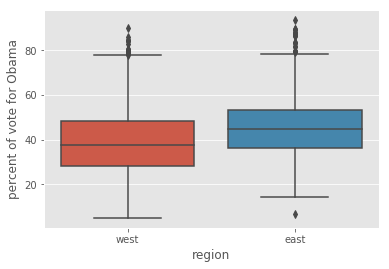

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
_ = sns.boxplot(x='east_west', y='dem_share',data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

# Let’s practice!

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

### Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [13]:
# Specify array of percentiles: percentiles
percentiles =np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

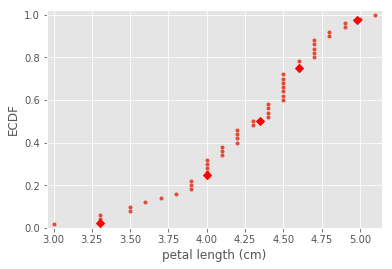

In [15]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

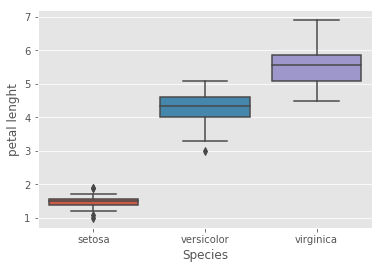

In [16]:
# Create box plot with Seaborn's default settings

_ = sns.boxplot(x='species',y='petal_length',data=iris)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('petal lenght')

# Show the plot

plt.show()

---

# Variance and standard deviation

# Variance : $spread$ of data
**average of the squared distance from the mean**

- The mean squared distance of the data from their
mean
- Informally, a measure of the spread of data

# 2008 Florida election results

![](https://i.imgur.com/xUZUC9A.png)


# Computing the variance

In [17]:
np.var(dem_share_FL)

147.44278618846067

# Computing the standard deviation

Standar deviation :**square root of  the variance**

In [18]:
np.std(dem_share_FL)

12.142602117687158

In [19]:
np.sqrt(np.var(dem_share_FL))

12.142602117687158

# 2008 Florida election results

![](https://i.imgur.com/27yPgWZ.png)




# Let’s practice!

## Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

In [21]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print('variance explicit:\t{}\nvariance numpy:\t\t{}'.format(variance_explicit,variance_np))

variance explicit:	0.21640000000000004
variance numpy:		0.21640000000000004


## The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

In [22]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print( np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


# Covariance and the Pearson correlation coefficient

## 2008 US swing state election results


![](https://i.imgur.com/ohdXRaT.png)






## Generating a scatter plot

In [23]:
total_votes = df_swing.total_votes
dem_share = df_swing.dem_share

In [24]:
dem_share_mean = dem_share.mean()
dem_share_mean

43.76441441441442

In [25]:
mean_total_votes = total_votes.mean()
mean_total_votes

90424.51351351352

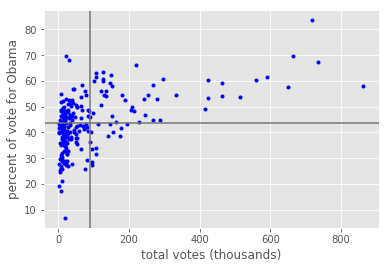

In [26]:
_ = plt.plot(total_votes/1000, dem_share,marker='.', linestyle='none',color='b')
# mean total votes line
_ = plt.axvline(x=mean_total_votes/1000, color='0.45', linestyle='-')

# dem share mean line
_ = plt.axhline(y=dem_share_mean, color='0.45', linestyle='-')

_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# Covariance

### -  A measure of how two quantities vary together

Cov

## Calculation of the covariance

![](https://i.imgur.com/TyjZvaB.png)



![](https://i.imgur.com/IGdHB0k.png)


# Pearson correlation coefficient

Comparison of variability of the data due to codependence **(the covariance)** to the variability inherent to each variable independently **(their standar deviation)**
- dimentionless
- range:
    - $-1$ Complete anticorrelation
    - $+1$ Complete positive correlation

#### Good metric for correlation between two variables



$\rho$

$= \text{Pearson correlation} $


$ = \frac{\text{covariance}}{\text{(std of x)}\text{(std of y)}}$

$= \frac{\text{variability due to codependence}}{\text{independent variability}}$

![](https://i.imgur.com/59HofSb.png)

# Let’s practice!

## Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

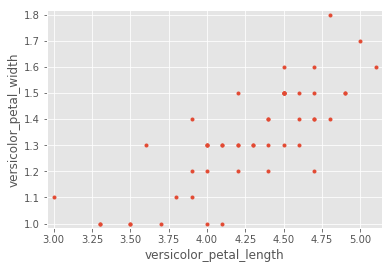

In [31]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')




# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

## Variance and covariance by looking
Consider four scatter plots of x-y data, appearing to the right. Which has, respectively,

the highest variance in the variable x,
the highest covariance,
negative covariance

![](https://i.imgur.com/arDopRg.png)

> d,c,b

## Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

In [32]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov

petal_cov = covariance_matrix[0,1]

# Print the length/width covariance

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

In [34]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
